#Correlation and regression

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Reading data

data=pd.read_csv("/content/Add_sales_data_2018.csv")
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


(1) First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.

In [ ]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [ ]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [ ]:
data.pop('Date')

0      2018-10-08
1      2018-10-05
2      2018-10-04
3      2018-10-03
4      2018-10-01
          ...    
200    2017-12-14
201    2017-12-13
202    2017-12-12
203    2017-12-11
204    2017-12-08
Name: Date, Length: 205, dtype: object

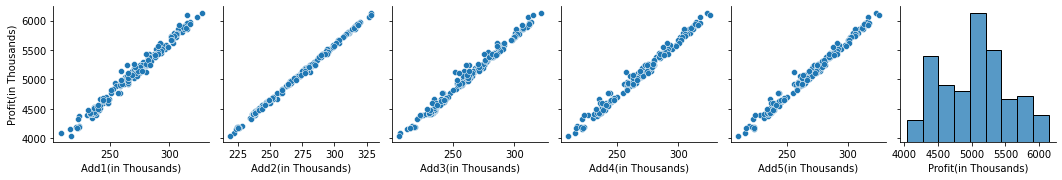

In [82]:
#draw pairplot on given data
sns.pairplot(data,y_vars='Profit(in Thousands)')

Profit is directly proportional to the advertisement spendings

(2)Build a regression model to predict the profit from the given data and 
comment your findings on it.

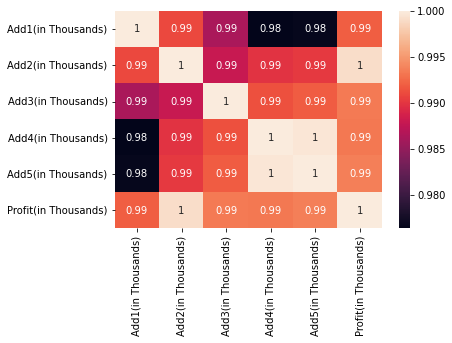

In [ ]:
cr=data.corr()
sns.heatmap(cr,annot=True)

Advertisement spending is highly positively corelated to profit earned by the company.

* Building a regression modal

In [ ]:
y=data['Profit(in Thousands)']
x=data.drop(['Profit(in Thousands)'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=100)

In [ ]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)

160    5387.438
186    5861.830
59     5190.814
165    5107.437
140    5250.150
64     5239.060
198    5435.316
75     5163.693
172    5789.791
104    5518.561
200    5374.105
136    4915.682
111    5491.792
41     4453.205
73     4936.120
31     4617.695
156    5137.534
133    4821.542
65     5075.858
83     4980.446
195    5667.250
Name: Profit(in Thousands), dtype: float64


In [ ]:
print(predictions)

[5387.438 5861.83  5190.814 5107.437 5250.15  5239.06  5435.316 5163.693
 5789.791 5518.561 5374.105 4915.682 5491.792 4453.205 4936.12  4617.695
 5137.534 4821.542 5075.858 4980.446 5667.25 ]


In [ ]:
print("mse is",mean_squared_error(y_test, predictions))

mse is 1.2604656953188992e-24


In [86]:
r2=model.score(x_test,y_test)

In [87]:
print('r2 value for the model is', r2)

r2 value for the model is 1.0


r^2 value 1 represents model is perfect

(3)  Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement. 
 
Add1(in Thousands) 290 
Add2(in Thousands) 312 
Add3(in Thousands) 309 
Add4(in Thousands) 298 
Add5(in Thousands) 320

In [ ]:
dataN={'Add1(in Thousands)':[290],'Add2(in Thousands)':[312],'Add3(in Thousands)':[309],'Add4(in Thousands)':[298],'Add5(in Thousands)':[320]}

In [ ]:
df=pd.DataFrame(dataN)

In [ ]:
print(df)

   Add1(in Thousands)  ...  Add5(in Thousands)
0                 290  ...                 320

[1 rows x 5 columns]


In [ ]:
model.predict(df)

array([5820.06])

The profit generated by the company with above menteioned spending is 5820.06(in thousands)